# Scraping Concerts - Lab

## Introduction

Now that you've seen how to scrape a simple website, it's time to again practice those skills on a full-fledged site!
In this lab, you'll practice your scraping skills on a music website: https://www.residentadvisor.net.
## Objectives

You will be able to:
* Create a full scraping pipeline that involves traversing over many pages of a website, dealing with errors and storing data

## View the Website

For this lab, you'll be scraping the https://www.residentadvisor.net website. Start by navigating to the events page [here](https://www.residentadvisor.net/events) in your browser.

<img src="images/ra.png">

In [ ]:
# Load the https://www.residentadvisor.net/events page in your browser.

In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.residentadvisor.net/events/us/newyork'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'html.parser')

In [4]:
soup.find('div', id = 'event-listing').findAll('li')[0].text.replace('/', '').strip()

'Tue, 15 Sep 2020'

## Open the Inspect Element Feature

Next, open the inspect element feature from your web browser in order to preview the underlying HTML associated with the page.

In [ ]:
# Open the inspect element feature in your browser

## Write a Function to Scrape all of the Events on the Given Page Events Page

The function should return a Pandas DataFrame with columns for the Event_Name, Venue, Event_Date and Number_of_Attendees.

In [46]:
def scrape_events(events_page_url):
    #Your code here
    resp = requests.get(events_page_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    name_list = []
    venue_list = []
    date_list = []
    attendees_list = []
    
    for x in soup.find('div', id = 'event-listing').findAll('li'):
        if x.find(class_ = 'eventDate date'):
            date = x.text.replace('/', '').strip()
        elif (x.find(class_ = 'event-item clearfix')) or (x.find(class_ = 'event-item clearfix tickets-bkg-logo')):
            name_list.append(x.find(class_ = 'event-title').find('a').text)
            venue_list.append(x.find('h1').find('span').text.replace('at', '').strip())
            date_list.append(date)
            try:
                attendees_list.append(x.find('p', class_ = 'attending').text.replace('Attending', '').strip())
            except:
                attendees_list.append(0)
          
                
            
            
    df = pd.DataFrame({'Event_Name' : name_list, 'Venue' : venue_list, 
                      'Event_Date' : date_list, 'Number_of_Attendees' : attendees_list})
    
  
    return df

In [38]:
scrape_events('https://www.residentadvisor.net/events/us/newyork')

,Event_Name,Venue,Event_Date,Number_of_Attendees
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,"Wed, 16 Sep 2020",2
1,Cold Waves + Popgun present: Front 242,Elsewhere,"Thu, 17 Sep 2020",8
2,Outdoor Films: The Harder They Come,Nowadays,"Mon, 21 Sep 2020",3
3,Outdoor Films: The Harder They Come,Nowadays,"Tue, 22 Sep 2020",3
4,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Tue, 22 Sep 2020",1


## Write a Function to Retrieve the URL for the Next Page

In [16]:
'https://www.residentadvisor.net' + soup.find('li', class_ = 'but arrow-right right').find('a')['href']

'https://www.residentadvisor.net/events/us/newyork/week/2020-09-22'

In [14]:
url

'https://www.residentadvisor.net/events/us/newyork'

In [17]:
def next_page(url):
    #Your code here
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    back_of_url = soup.find('li', class_ = 'but arrow-right right').find('a')['href']
    next_page_url = 'https://www.residentadvisor.net' + back_of_url
    return next_page_url

In [18]:
next_page('https://www.residentadvisor.net/events/us/newyork')

'https://www.residentadvisor.net/events/us/newyork/week/2020-09-23'

In [21]:
df1 = pd.DataFrame()

df_first_page = scrape_events('https://www.residentadvisor.net/events/us/newyork')

In [23]:
df1 = pd.concat([df1, df_first_page])
df1

,Event_Name,Venue,Event_Date,Number_of_Attendees
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,"Wed, 16 Sep 2020",2
1,Cold Waves + Popgun present: Front 242,Elsewhere,"Thu, 17 Sep 2020",8
2,Outdoor Films: The Harder They Come,Nowadays,"Mon, 21 Sep 2020",3
3,Outdoor Films: The Harder They Come,Nowadays,"Tue, 22 Sep 2020",3
4,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Tue, 22 Sep 2020",1
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,"Wed, 16 Sep 2020",2
1,Cold Waves + Popgun present: Front 242,Elsewhere,"Thu, 17 Sep 2020",8
2,Outdoor Films: The Harder They Come,Nowadays,"Mon, 21 Sep 2020",3
3,Outdoor Films: The Harder They Come,Nowadays,"Tue, 22 Sep 2020",3
4,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Tue, 22 Sep 2020",1


In [24]:
next_url = next_page('https://www.residentadvisor.net/events/us/newyork')
next_url

'https://www.residentadvisor.net/events/us/newyork/week/2020-09-23'

In [26]:
df_second_page = scrape_events(next_url)
df_second_page

,Event_Name,Venue,Event_Date,Number_of_Attendees
0,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Wed, 23 Sep 2020",1
1,[RESCHEDULED] Black Party 2020,New York Expo Center,"Sat, 26 Sep 2020",24
2,United By Dance,Yasgur Road,"Sat, 26 Sep 2020",6
3,Live It Up Midnight Yacht Cruise,Harbor Lights Yacht,"Sat, 26 Sep 2020",3


In [27]:
df1 = pd.concat([df1, df_second_page])
df1

,Event_Name,Venue,Event_Date,Number_of_Attendees
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,"Wed, 16 Sep 2020",2
1,Cold Waves + Popgun present: Front 242,Elsewhere,"Thu, 17 Sep 2020",8
2,Outdoor Films: The Harder They Come,Nowadays,"Mon, 21 Sep 2020",3
3,Outdoor Films: The Harder They Come,Nowadays,"Tue, 22 Sep 2020",3
4,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Tue, 22 Sep 2020",1
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,"Wed, 16 Sep 2020",2
1,Cold Waves + Popgun present: Front 242,Elsewhere,"Thu, 17 Sep 2020",8
2,Outdoor Films: The Harder They Come,Nowadays,"Mon, 21 Sep 2020",3
3,Outdoor Films: The Harder They Come,Nowadays,"Tue, 22 Sep 2020",3
4,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Tue, 22 Sep 2020",1


## Scrape the Next 1000 Events for Your Area

Display the data sorted by the number of attendees. If there is a tie for the number attending, sort by event date.

In [47]:
#Your code here

df1 = pd.DataFrame()
url = 'https://www.residentadvisor.net/events/us/newyork'

while len(df1) < 1000:
    print(f'Currently have {len(df1)} events scraped')
    
    df_events = scrape_events(url)
    
    df1 = pd.concat([df1, df_events])
    
    try:
        url = next_page(url)
    except:
        break
    

Currently have 0 events scraped
Currently have 5 events scraped
Currently have 9 events scraped
Currently have 11 events scraped
Currently have 16 events scraped
Currently have 20 events scraped
Currently have 20 events scraped
Currently have 21 events scraped
Currently have 25 events scraped
Currently have 28 events scraped
Currently have 28 events scraped
Currently have 30 events scraped
Currently have 32 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 33 events scraped
Currently have 35 events scraped
Currently have 35 events scraped
Currently have 35 events scraped
Currently have 35 events scraped
Currently have 36 events scraped
Currently have 36 events scraped
Currently have 36 events scraped
Currently have 36 events scraped
Currently have 36 events scraped
Currently hav

In [64]:
url

'https://www.residentadvisor.net/events/us/newyork/week/2021-08-04'

In [65]:
df1.head()

,Event_Name,Venue,Event_Date,Number_of_Attendees,Event_date
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,"Wed, 16 Sep 2020",2,2020-09-16
1,Cold Waves + Popgun present: Front 242,Elsewhere,"Thu, 17 Sep 2020",8,2020-09-17
2,Outdoor Films: The Harder They Come,Nowadays,"Mon, 21 Sep 2020",3,2020-09-21
3,Outdoor Films: The Harder They Come,Nowadays,"Tue, 22 Sep 2020",3,2020-09-22
4,Outdoor Films: The Black Power Mixtape 1967-1975,Nowadays,"Tue, 22 Sep 2020",1,2020-09-22


In [69]:
df1['Event_Date'] = pd.to_datetime(df1['Event_Date'])


In [67]:
df1.dtypes

Event_Name                     object
Venue                          object
Event_Date                     object
Number_of_Attendees            object
Event_date             datetime64[ns]
dtype: object

In [70]:
df1.head(2)

,Event_Name,Venue,Event_Date,Number_of_Attendees,Event_date
0,Outdoor Films: Fela: Music Is The Weapon and F...,Nowadays,2020-09-16,2,2020-09-16
1,Cold Waves + Popgun present: Front 242,Elsewhere,2020-09-17,8,2020-09-17


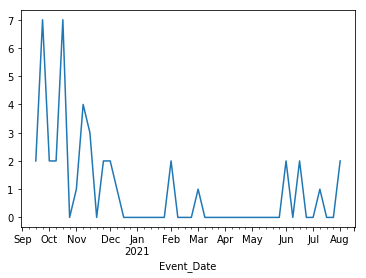

In [76]:
df1.set_index('Event_Date').resample('W')['Event_Name'].count().plot(kind = 'line')
plt.show()

## Summary 

Congratulations! In this lab, you successfully developed a pipeline to scrape a website for concert event information!